<a href="https://colab.research.google.com/github/meyasa/Assignment_DSF-15/blob/main/Mediansyah_Assignment_DSF15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [11]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
# Importing Decision Tree Regressor model from scikit learn
from sklearn.tree import DecisionTreeRegressor
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
# Importing Tabulate
from tabulate import tabulate

**0. Menggunakan dataset student score**
_____________________________________________

In [2]:
dataset = pd.read_excel('student_scores.xlsx')
dataset.head()

,Hours (x),Scores (y)
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


Berikut adalah deskripsi singkat untuk setiap kolom dalam dataset Scores Hour:

1. `hours`: Menunjukkan jumlah spending jam yang digunakan

2. `scores`: Berupa nilai yang berkorelasi terhadap kolom hours

**1. Melakukan proses Exploratory data analysis**


_____________________________________________

In [7]:
dataset.describe()

,Hours (x),Scores (y)
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


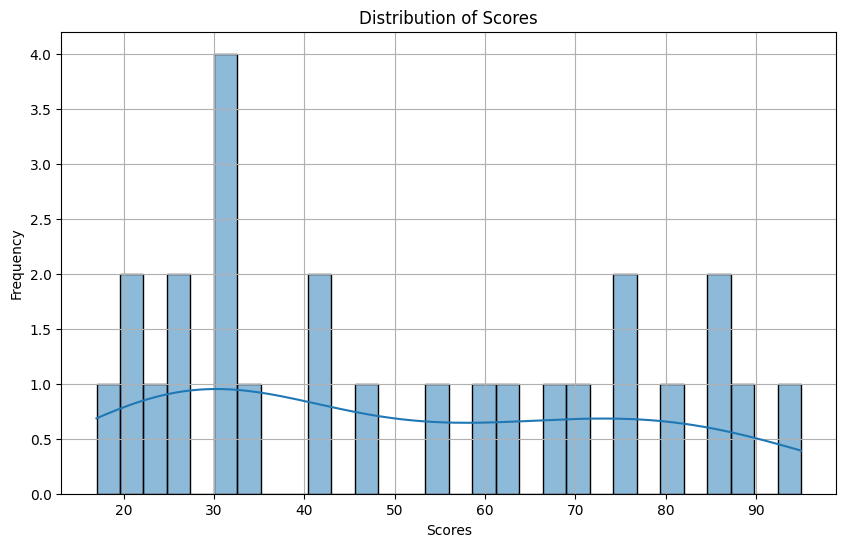

In [15]:
# Histogram untuk distribusi Scores (y)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Scores (y)'].dropna(), kde=True, bins=30)
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

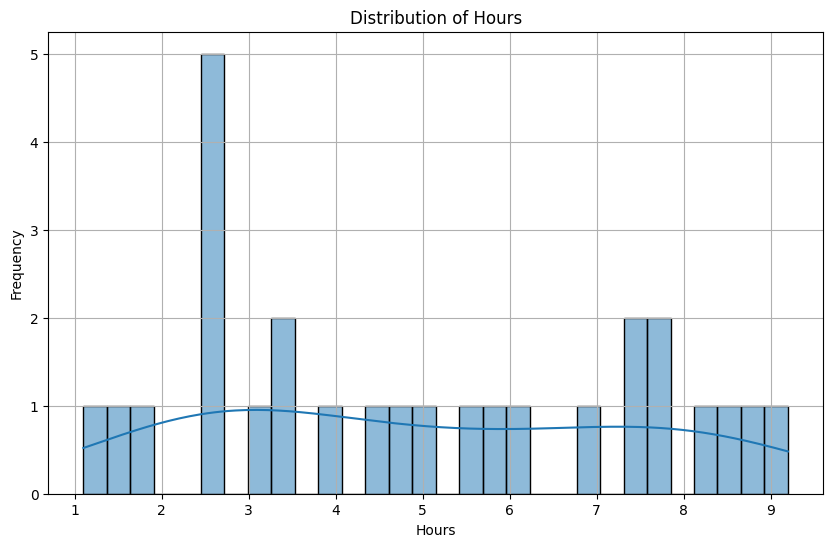

In [16]:
# Histogram untuk distribusi hours (x)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Hours (x)'].dropna(), kde=True, bins=30)
plt.title('Distribution of Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 500x1000 with 0 Axes>

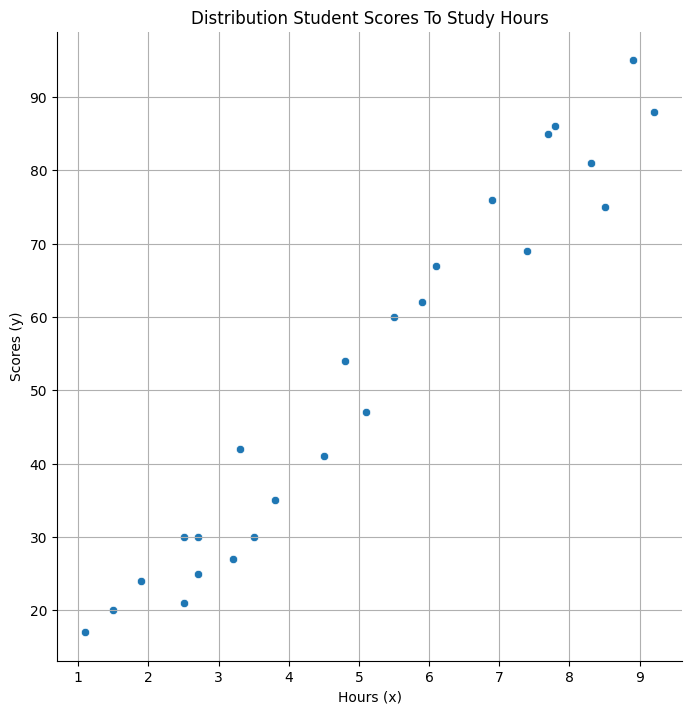

In [10]:
# @title distribution Student Scores to Study Hours

plt.figure(figsize=(5, 10))
sns.pairplot(dataset,x_vars=['Hours (x)'],y_vars=['Scores (y)'],size=7,kind='scatter')
plt.title('Distribution Student Scores To Study Hours')
plt.xlabel('Hours (x)')
plt.ylabel('Scores (y)')
plt.grid(True)
plt.show()

**2. Feature Engineering**


*   Check Duplicated Data

*   Check Missing Value Handling

*   Outlier Analysis



In [3]:
# Copy data untuk kebutuhan Data Engineering

dse = dataset.copy()

In [12]:
# @title Check Duplicate Data
print("Before Duplicates Check:")
print(dse.shape)
print("\nMany of Duplicates :", dse.duplicated().sum())

Before Duplicates Check:
(27, 2)

Many of Duplicates : 1


In [13]:
# pengecekan data duplikat

print("\nJumlah data duplikat:", dse.duplicated().sum())

# tidak ada indikasi data duplikat


Jumlah data duplikat: 1


In [14]:

#######################################################################
# jika ada data duplicate, maka diperlika langkah berikut dibawah ini #
#######################################################################

# menampilkan data duplicate

duplicate_rows_before = dse[dse.duplicated()]
duplicate_rows_before


,Hours (x),Scores (y)
25,2.5,30.0


In [15]:
# action to drop duplicates

dse = dse.drop_duplicates()


In [38]:
print("\nAfter Drop Duplikat:")
print(dse.shape)


After Drop Duplikat:
(26, 2)


In [29]:
# @title Pengecekan nilai null
#########################
###Check missing value###
#########################

print("\nMissing Value Check")
print(dse.isnull().sum())


Missing Value Check
Hours (x)     0
Scores (y)    1
dtype: int64


In [16]:

# Fill the missing value any column using modus
for column in dse.columns:
    if dse[column].isnull().sum() > 0:
        mode_value = dse[column].mode()[0]
        dse[column].fillna(mode_value, inplace=True)


In [17]:
print(dse.isnull().sum())

Hours (x)     0
Scores (y)    0
dtype: int64


In [41]:
dse.info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 26
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours (x)   26 non-null     float64
 1   Scores (y)  26 non-null     float64
dtypes: float64(2)
memory usage: 624.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours (x)   27 non-null     float64
 1   Scores (y)  26 non-null     float64
dtypes: float64(2)
memory usage: 560.0 bytes


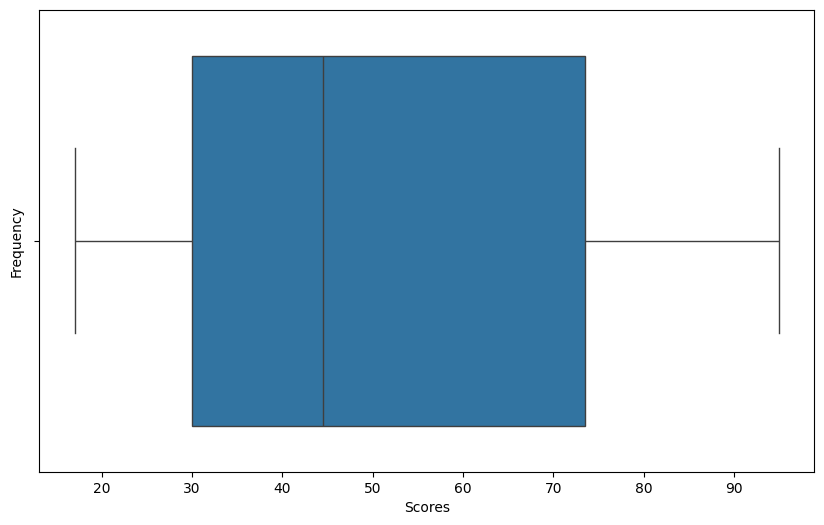

In [18]:
# @title Outlier Analysis


plt.figure(figsize=(10, 6))
sns.boxplot(x="Scores (y)", data=dse)
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

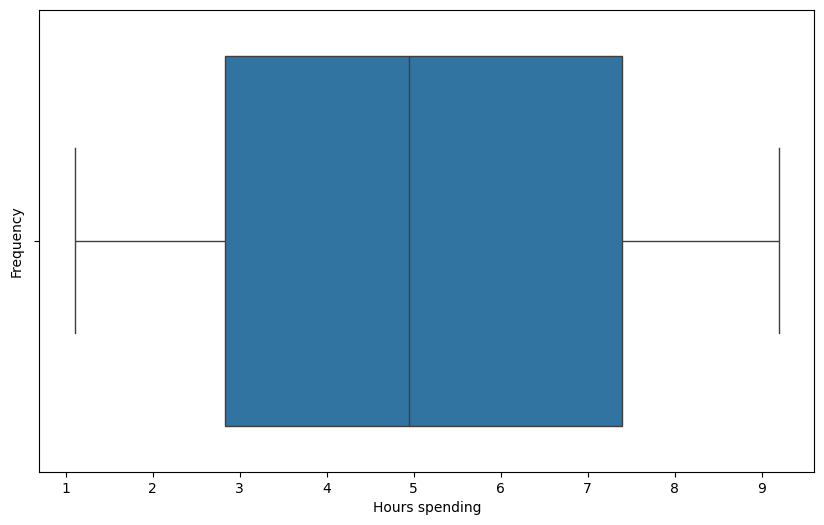

In [19]:
# @title Outlier Analysis


plt.figure(figsize=(10, 6))
sns.boxplot(x="Hours (x)", data=dse)
plt.xlabel("Hours spending")
plt.ylabel("Frequency")
plt.show()

There's no outlier value

There are no problems in investigate Feature Engineering, next we are doing machine learning modelling and splitting data into X_train, X_test -> Predictor, y_train, y_test -> target variables. If there are problems in investigate feature engineering then doing splitting data and process feature engineering handling.

# **4. Modelling machine learning regression**

In [20]:
# @title ### Spliting Hours of spending


X = dse['Hours (x)']
X.head()

,Hours (x)
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [21]:
# Scores data
y = dse['Scores (y)']
y.head()

,Scores (y)
0,21.0
1,47.0
2,27.0
3,75.0
4,30.0


In [22]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)
# X_train dan y_train -> knowledge dari dosen ke mahasiswa (X_train contoh soal), y_train (kunci jawaban dari contoh soal)
# X_test dan y_test -> soal2 ujian (UTS maupun UAS) (X_test), y_test (kunci jawaban dosennya / data aktual)

In [23]:
X_train

,Hours (x)
1,5.1
23,6.9
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
21,4.8
17,1.9


In [24]:
# @title Linear Regression

# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy() # Kolom x nya ada 1 saja, jika lebih dari 1 untuk x nya maka tidak code to_numpy() dibiarkan dalam bentuk dataframe
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

# Fitting the model using Linear Regression
lr_model = LinearRegression() # Mahasiswa A
lr_model.fit(X_train,y_train) # Belajar

LinearRegression()

In [25]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([49.75231538, 65.63474901, 17.98744811, 32.98752432, 44.45817083,
       83.28189749, 79.75246779, 35.63459659, 47.1052431 , 21.51687781,
       38.28166886, 58.57588962, 70.04653613, 28.5757372 , 53.28174507,
       72.6936084 , 14.45801842, 70.04653613, 85.92896976])

In [26]:
# Predicting the Salary for the Test values
y_pred_lr = lr_model.predict(X_test) # UTS ataupun UAS
# y_pred_lr -> jawaban mahasiswa linear regression

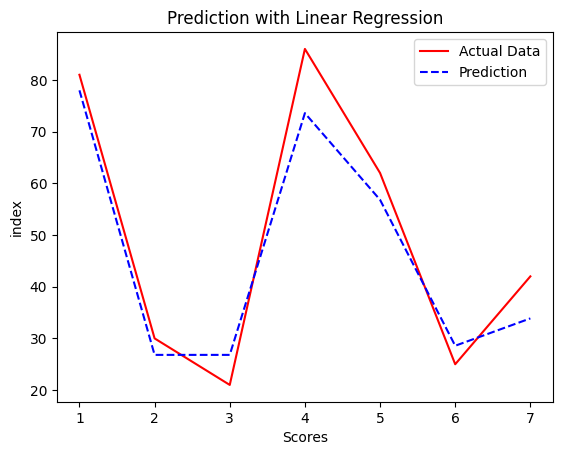

In [27]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_lr,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [39]:
# @title Decision Tree Regrassion

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test) # soal uts maupun uas

y_pred_dt


array([75., 30., 30., 85., 67., 30., 27.])

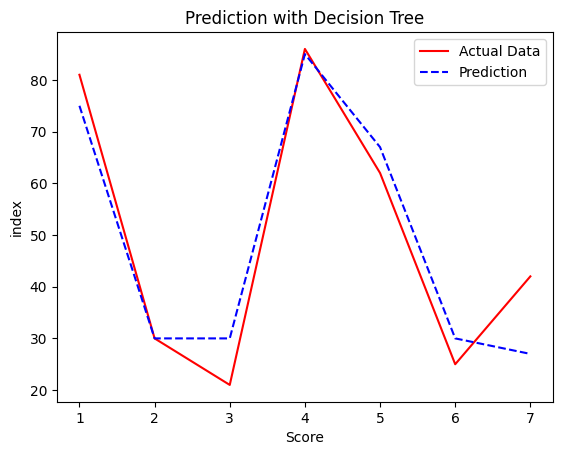

In [29]:


# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Score')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
#############################################################################


In [ ]:
# @title Evaluation of the model


In [30]:
# Calculate R square vale Linear Regrassion
rsq_lr = r2_score(y_test,y_pred_lr)

print('r square Linear Regression:',rsq_lr)

# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)



r square Linear Regression: 0.927668103991813
Intercept of the Linear Regression model: 4.752086751481578
Coefficient of the line Linear Regression: [8.82357424]


In [31]:
# Calculate R square vale Decision Tree
rsq_dt = r2_score(y_test,y_pred_dt)
print('r square Decision Tree Results:',rsq_dt)




r square Decision Tree Results: 0.9092318859707008


In [32]:
data_r2= [rsq_lr,rsq_dt]
print (tabulate([data_r2],
      headers=["Linear Regression", "Decision Tree"]))

  Linear Regression    Decision Tree
-------------------  ---------------
           0.927668         0.909232


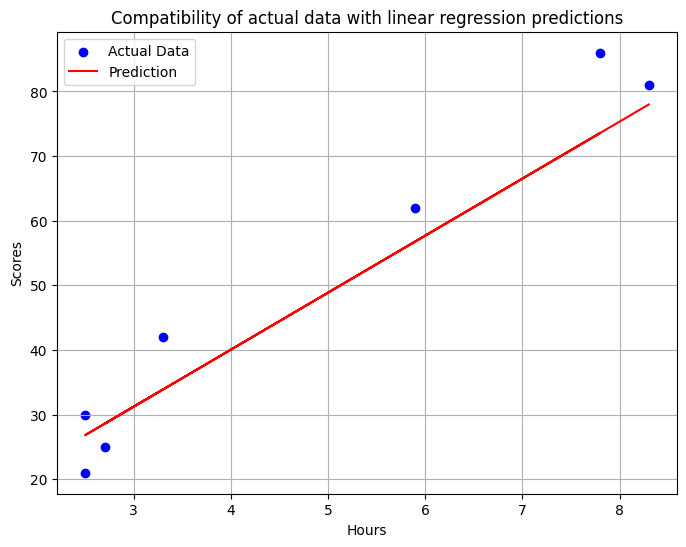

In [38]:
# @title Student Scores terhadap Study Hours

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_lr, color='red', label='Prediction')
plt.title('Compatibility of actual data with linear regression predictions')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

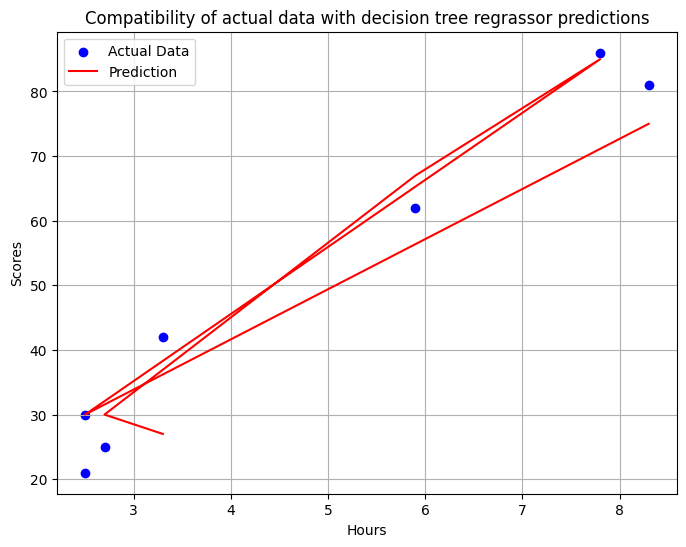

In [42]:
# @title Student Scores terhadap Study Hours

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_dt, color='red', label='Prediction')
plt.title('Compatibility of actual data with decision tree regrassor predictions')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()